Os dados de reservas de hot√©is foram carregados corretamente e incluem uma variedade de colunas que podem ser exploradas. Aqui est√£o algumas das colunas mais relevantes:

- **hotel**: Tipo de hotel (Resort ou Urbano).
- **is_canceled**: Indica se a reserva foi cancelada (0 para n√£o cancelada, 1 para cancelada).
- **lead_time**: Tempo em dias entre a reserva e o check-in.
- **arrival_date_year**: Ano de chegada.
- **arrival_date_month**: M√™s de chegada.
- **stays_in_weekend_nights**: N√∫mero de noites no fim de semana da estadia.
- **stays_in_week_nights**: N√∫mero de noites durante a semana da estadia.
- **adults**: N√∫mero de adultos na reserva.
- **children**: N√∫mero de crian√ßas na reserva.
- **adr**: Taxa m√©dia di√°ria aplicada (tarifa por noite).
- **required_car_parking_spaces**: N√∫mero de vagas de estacionamento necess√°rias.
- **total_of_special_requests**: N√∫mero de pedidos especiais feitos pelos clientes.
- **reservation_status**: Status da reserva (Check-Out, Cancelada, etc.).


Esses dados podem ser √∫teis para explorar perguntas como:

- Quando √© mais comum o cancelamento de reservas?
- Qual a rela√ß√£o entre o tempo de anteced√™ncia da reserva (lead_time) e o cancelamento?
- Quais fatores influenciam o n√∫mero de pedidos especiais?


### Etapa do Plano (PACE):

#### 1. Quem s√£o as partes interessadas neste projeto?

- **Ger√™ncia do hotel**: A principal parte interessada, pois uma melhor previs√£o de cancelamentos ou padr√µes de reservas permite otimizar as opera√ß√µes do hotel, reduzir custos e aumentar a receita.
- **Equipe de Vendas e Marketing**: Interessada em entender os padr√µes de reservas para adaptar estrat√©gias promocionais.
- **Clientes**: Embora indiretamente, os clientes s√£o beneficiados pela melhoria dos servi√ßos e ofertas.
- **O analista de dados (voc√™)**: Fornecendo insights e previs√µes com base no comportamento passado dos h√≥spedes.


#### 2. O que est√° tentando resolver ou realizar?

O principal objetivo √© entender quais fatores influenciam o cancelamento de reservas e o comportamento dos h√≥spedes em rela√ß√£o √† dura√ß√£o da estadia, solicita√ß√µes especiais, e padr√µes sazonais. Al√©m disso, pretende-se construir um modelo preditivo para prever se uma reserva ser√° cancelada, ajudando o hotel a planejar melhor a ocupa√ß√£o e a aloca√ß√£o de recursos.


### 3. Quais s√£o as suas observa√ß√µes iniciais ao explorar os dados?

Ao explorar os dados de reservas, algumas observa√ß√µes iniciais podem ser feitas:

- As vari√°veis relacionadas ao tempo, como ‚Äúlead_time‚Äù, ‚Äúarrival_date_month‚Äù, e ‚Äúarrival_date_week_number‚Äù, podem ter correla√ß√µes com o cancelamento de reservas.

- A quantidade de pedidos especiais (coluna ‚Äútotal_of_special_requests‚Äù) e as vagas de estacionamento requisitadas podem indicar comportamentos espec√≠ficos de h√≥spedes.

- A distribui√ß√£o entre os tipos de hot√©is (Resort Hotel e City Hotel) pode apresentar padr√µes distintos em termos de taxa de cancelamento, dura√ß√£o de estadia, etc.

- Ser√° importante verificar a correla√ß√£o entre vari√°veis como ‚Äúlead_time‚Äù (tempo entre a reserva e o check-in) e ‚Äúis_canceled‚Äù, bem como o impacto do tipo de hotel e do tipo de cliente (‚Äúcustomer_type‚Äù).

#### ‚Ä¢	Ferramentas de an√°lise de dados: 

- **Python** com bibliotecas como pandas, matplotlib, scikit-learn para an√°lise explorat√≥ria (EDA) e constru√ß√£o do modelo preditivo.

- **Plataformas de benchmark**: Kaggle e artigos relacionados para comparar solu√ß√µes e metodologias aplicadas a problemas semelhantes de previs√£o de cancelamentos e comportamento de clientes em hot√©is.

- **Guias e boas pr√°ticas de ci√™ncia de dados**: Para garantir um processo estruturado e √©tico de modelagem preditiva.

#### . Tem alguma considera√ß√£o √©tica nesta etapa?

Sim, h√° considera√ß√µes √©ticas:

- **Privacidade dos clientes**: Embora os dados j√° tenham sido anonimizados, √© crucial garantir que n√£o haja forma de identificar h√≥spedes individuais.

- **Implica√ß√µes preditivas**: O modelo preditivo n√£o deve ser utilizado de maneira que impacte negativamente os clientes, como discrimina√ß√£o baseada em padr√µes detectados (exemplo: recusar uma reserva por antecipar que o cliente ir√° cancelar).

- **Transpar√™ncia**: √â importante comunicar claramente como o modelo est√° sendo utilizado e garantir que ele serve como ferramenta de apoio, e n√£o de decis√£o final em pol√≠ticas de cancelamento ou reten√ß√£o de clientes.


#### Passo 1. Importa√ß√µes
- Importar pacotes
- Carregar conjunto de dados

In [10]:
# Import packages
### YOUR CODE HERE ###
# For data manipulation
import numpy as np
import pandas as pd
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)
# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree
# For saving models
import pickle

### Carregar conjunto de dados

`Pandas` √© utilizado para ler um conjunto de dados denominado **`hotel_bookings.csv`.** Continue com esta atividade, completando as seguintes instru√ß√µes.

In [12]:
# Load dataset into a dataframe
hotel_data= pd.read_csv("hotel_bookings.csv")


# Display first few rows of the dataframe
hotel_data.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    NaN      NaN   
1                  C                4   No Deposit    NaN      NaN   
2                  C                0   No Deposit    NaN      NaN   
3                  A                0   No Deposit  304.0      NaN   
4                  A                0   No Deposit  240.0      NaN   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

## Passo 2. Explora√ß√£o de dados (EDA inicial e limpeza de dados)

- Entenda as suas vari√°veis
- Limpe o seu conjunto de dados (dados em falta, dados redundantes, valores discrepantes)

#### Re√∫na informa√ß√µes b√°sicas sobre os dados

In [15]:
# Re√∫na informa√ß√µes b√°sicas sobre os dados
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Re√∫na estat√≠sticas descritivas sobre os dados

In [17]:
# Re√∫na estat√≠sticas descritivas sobre os dados
hotel_data.describe()

is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_canceled  \
count           119390.000000                   119390.000000   
mean                 0.087118                        0.137097   
std                  0.844336                        1.497437   
min                  0.000000                        0.000000   
25%                  0.000000                        0.000000   
50%                  0.000000                        0.000000   
75%                  0.000000                        0.000000   
max                 26.000000                       72.000000   

       booking_changes          agent      company  days_in_waiting_list  \
count    119390.000000  103050.000000  6797.000000         119390.000000   
mean          0.221124      86.693382   189.266735              2.321149   
std           0.652306     110.774548   131.655015             17.594721   
min           0.000000       1.000000     6.000000              0.000000   
25%           0.000000       9.000000    62.000000              0.000000   
50%           0.000000      14.000000   179.000000              0.000000   
75%           0.000000     229.000000   270.000000              0.000000   
max          21.000000     535.000000   543.000000            391.000000   

                 adr  required_car_parking_spaces  total_of_special_requests  
count  119390.000000                119390.000000              119390.000000  
mean      101.831122                     0.062518                   0.571363  
std        50.535790                     0.245291                   0.792798  
min        -6.380000                     0.000000                   0.000000  
25%        69.290000                     0.000000                   0.000000  
50%        94.57500

#### Ver colunas

In [19]:
#Mostra todos os nomes das colunas
hotel_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#### Verifique os valores em falta

Verifique se existem valores em falta nos dados.

In [21]:
#Verifica se existem valores em falta
hotel_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [22]:
# 1. Preencher valores ausentes na coluna 'children' com o valor mais frequente (moda)
hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)

# 2. Preencher valores ausentes na coluna 'country' com o valor mais frequente (moda)
hotel_data['country'].fillna(hotel_data['country'].mode()[0], inplace=True)

# 3. Preencher valores ausentes nas colunas 'agent' e 'company' com 0 (indicando aus√™ncia de agente ou empresa)
hotel_data['agent'].fillna(0, inplace=True)
hotel_data['company'].fillna(0, inplace=True)

/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_39344/3023977068.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel_data['children'].fillna(hotel_data['children'].mode()[0], inplace=True)
/var/folders/mp/_1mc66sj15dcx84w85zjp_fr0000gn/T/ipykernel_39344/3023977068.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whi

In [23]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Verifique duplicados

Verifique se existem entradas duplicadas nos dados.

In [25]:
#Verifique se existem duplicados
hotel_data.duplicated().sum()

32013

In [26]:
# Inspecione algumas linhas contendo duplicados, conforme necess√°rio
hotel_data[hotel_data.duplicated()].head()

hotel  is_canceled  lead_time  arrival_date_year  \
5    Resort Hotel            0         14               2015   
22   Resort Hotel            0         72               2015   
43   Resort Hotel            0         70               2015   
138  Resort Hotel            1          5               2015   
200  Resort Hotel            0          0               2015   

    arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
5                 July                        27                          1   
22                July                        27                          1   
43                July                        27                          2   
138               July                        28                          5   
200               July                        28                          7   

     stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
5                          0                     2       2       0.0       0   
22                         2                     4       2       0.0       0   
43                         2                     3       2       0.0       0   
138                        1                     0       2       0.0       0   
200                        0                     1       1       0.0       0   

    meal country market_segment distribution_channel  is_repeated_guest  \
5     BB     GBR      Online TA                TA/TO                  0   
22    BB     PRT         Direct               Direct                  0   
43    HB     ROU         Direct               Direct                  0   
138   BB     PRT      Online TA                TA/TO                  0   
200   BB     GBR      Online TA                TA/TO                  0   

     previous_cancellations  previous_bookings_not_canceled  \
5                         0                               0   
22                        0                               0   
43                        0                               0   
138                       0                               0   
200                       0                               0   

    reserved_room_type assigned_room_type  booking_changes deposit_type  \
5                    A                  A                0   No Deposit   
22                   A                  A                1   No Deposit   
43                   E                  E                0   No Deposit   
138                  D                  D                0   No Deposit   
200                  A                  A                0   No Deposit   

     agent  company  days_in_waiting_list customer_type     adr  \
5    240.0      0.0                     0     Transient   98.00   
22   250.0      0.0                     0     Transient   84.67   
43   250.0      0.0                     0     Transient  137.00   
138  240.0      0.0                     0     Transient   97.00   
200  240.0      0.0                     0     Transient  109.80   

     required_car_parking_spaces  total_of_special_requests  \
5                              0                          1   
22                             0                          1   
43                             0                          1   
138                            0                          0   
200                            0                          3   

    reservation_status reservation_status_date  
5            Check-Out              2015-07-03  
22           Check-Out              2015-07-07  
43           Check-Out              2015-07-07  
138           Canceled              2015-07-01  
200          Check-Out              2015-07-08

In [27]:
# Drop duplicates and save resulting dataframe in a new variable as needed
hotel_data1 = hotel_data.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
hotel_data1.head()

hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list customer_type   adr  required_car_parking_spaces  \
0                     0     Transient   0.0                            0   
1                     0     Transient   0.0                            0   
2                     0     Transient  75.0                            0   
3                     0     Transient  75.0                            0   
4                     0     Transient  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  
0                          0          Check-Out              2015-07-01  
1                          0          Check-Out              2015-07-01  
2                          0          Check-Out              2015-07-02  
3                          0          Check-Out              2015-07-02  
4                          1          Check-Out              2015-07-03

A etapa de limpeza de dados foi conclu√≠da com sucesso. Aqui est√£o as principais a√ß√µes realizadas e as informa√ß√µes b√°sicas ap√≥s a limpeza:

#### Limpeza de Dados:

1. **Remo√ß√£o de Duplicados**: O dataset foi reduzido de 119.390 entradas para 87.396, removendo 31.994 entradas duplicadas.
2. **Tratamento de Valores Ausentes**:
    - A coluna **children** teve seus **4** valores ausentes preenchidos com o valor mais frequente.
    - A coluna **country** teve **488** valores ausentes preenchidos com o valor mais frequente.
    - As colunas **agent** e **company** foram preenchidas com **0**, indicando a aus√™ncia de agente ou empresa associada.

- O dataset possui agora **87.396** registros e **32** colunas, sem valores ausentes restantes.
- **Tipos de dados**: 16 colunas num√©ricas **(int64 e float64)** e 12 colunas categ√≥ricas **(object)**.

#### Verifique valores discrepantes
Verifique se existem valores discrepantes nos dados.

In [31]:
# Fun√ß√£o para identificar outliers com base no IQR (Quartis)
def detectar_outliers(df, coluna):
    Q1 = df[coluna].quantile(0.25)
    Q3 = df[coluna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    print("limite inferior:", limite_inferior)
    print("limite superior:", limite_superior)
    
    # Filtrando os outliers
    outliers = df[(df[coluna] < limite_inferior) | (df[coluna] > limite_superior)]
    return outliers

# Detectando outliers na coluna 'lead_time' (exemplo)
outliers_lead_time = detectar_outliers(hotel_data1, 'lead_time')

# Exibir outliers detectados na coluna 'lead_time'
print("N√∫mero de linhas nos dados que cont√™m valores discrepantes em `lead_time`:", len(outliers_lead_time))

limite inferior: -160.0
limite superior: 296.0
N√∫mero de linhas nos dados que cont√™m valores discrepantes em `lead_time`: 2396


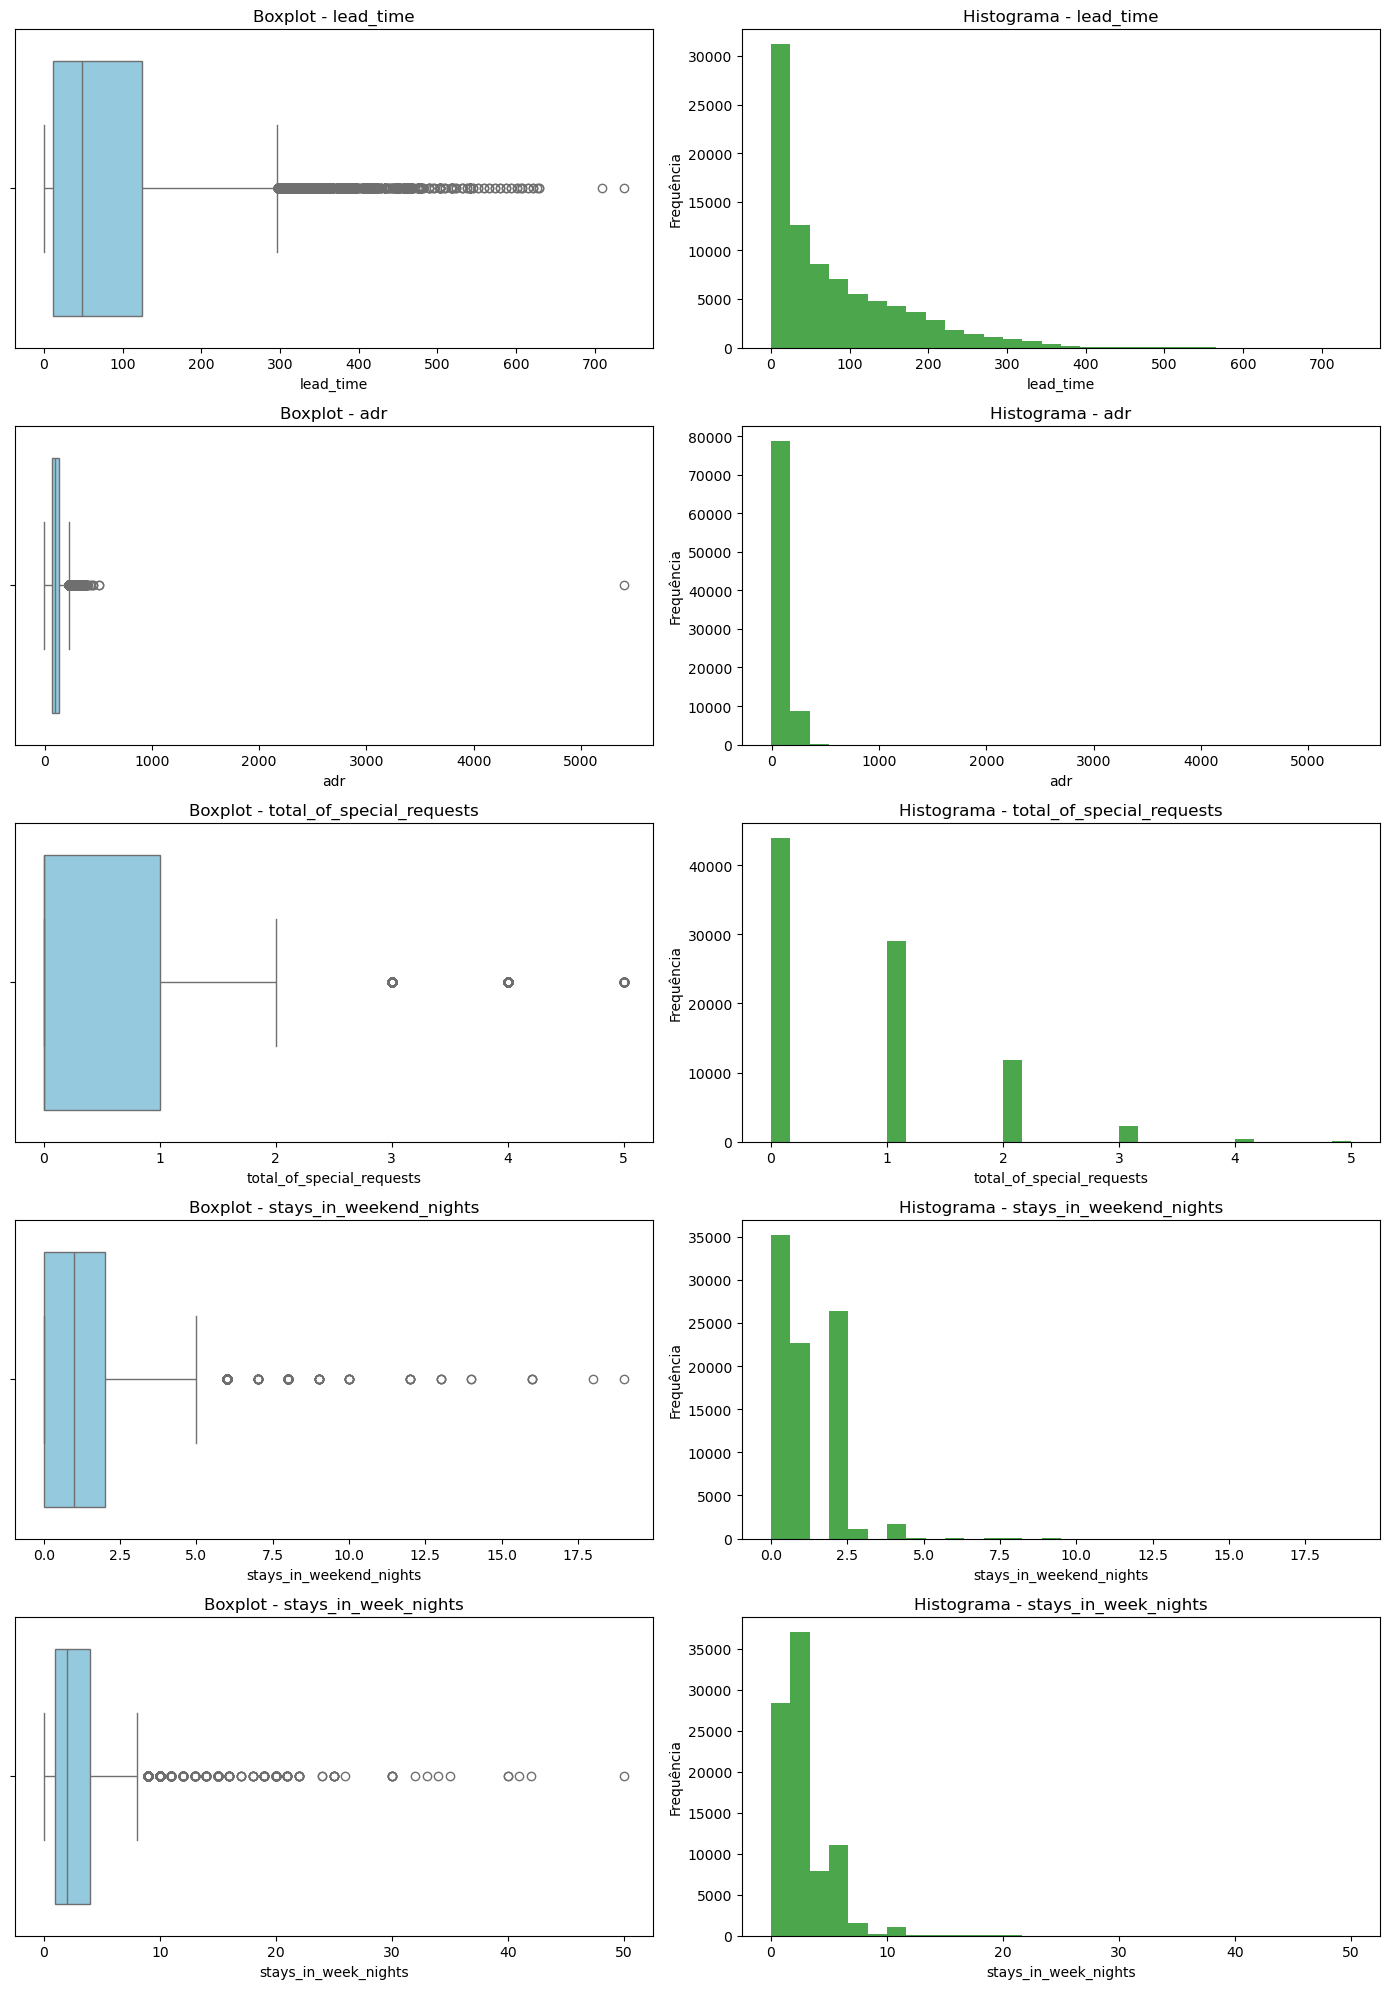

In [32]:
# Selecionar colunas num√©ricas para an√°lise de outliers
colunas_numericas = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'stays_in_week_nights']

# Configurar a √°rea do gr√°fico (2 linhas: uma para o boxplot e outra para o histograma)
fig, axs = plt.subplots(len(colunas_numericas), 2, figsize=(14, len(colunas_numericas) * 4))

# Loop para cada coluna num√©rica
for i, coluna in enumerate(colunas_numericas):
    # Boxplot
    sns.boxplot(x=hotel_data1[coluna], ax=axs[i, 0], color='skyblue')
    axs[i, 0].set_title(f'Boxplot - {coluna}', fontsize=12)
    
    # Histograma
    axs[i, 1].hist(hotel_data1[coluna], bins=30, color='green', alpha=0.7)
    axs[i, 1].set_title(f'Histograma - {coluna}', fontsize=12)
    axs[i, 1].set_xlabel(coluna)
    axs[i, 1].set_ylabel('Frequ√™ncia')

# Ajustar espa√ßamento entre os subplots
plt.tight_layout()
plt.show()

A an√°lise dos outliers na coluna **lead_time** identificou **2.396 valores discrepantes** com limites calculados entre -160 (inferior) e 296 (superior). A an√°lise gr√°fica mostra a distribui√ß√£o dos valores de v√°rias colunas num√©ricas.

Gr√°ficos gerados:

- **Boxplots**: Mostram a presen√ßa de outliers nas colunas analisadas.
- **Histogramas**: Exibem a distribui√ß√£o dos valores, ajudando a visualizar a frequ√™ncia de valores discrepantes.

# pAce: Analisar Est√°gio
- Realizar EDA (analisar rela√ß√µes entre vari√°veis)


üí≠
### Reflita sobre estas quest√µes ao concluir o est√°gio de an√°lise.

- O que observou sobre as rela√ß√µes entre as vari√°veis?
- O que observa sobre as distribui√ß√µes nos dados?
- Que transforma√ß√µes fez com os seus dados? Por que raz√£o escolheu tomar essas decis√µes?
- Quais s√£o alguns dos prop√≥sitos da EDA antes de construir um modelo preditivo?
- Que recursos utiliza ao concluir esta etapa? (Certifique-se de que inclui os links.)
- Tem alguma considera√ß√£o √©tica nesta etapa?

## Etapa de An√°lise (PACE):

**1. O que observou sobre as rela√ß√µes entre as vari√°veis?**

- **lead_time e is_canceled**: Parece haver uma rela√ß√£o entre o tempo de anteced√™ncia da reserva **(lead_time) e o cancelamento de reservas**. Reservas feitas com muita anteced√™ncia tendem a ter uma maior taxa de cancelamento.
- **adr (Average Daily Rate) e is_canceled**: Os pre√ßos mais altos tamb√©m parecem estar relacionados com uma maior chance de cancelamento, o que pode sugerir que os h√≥spedes com reservas mais caras podem reconsiderar suas estadias.
- **total_of_special_requests e stays_in_week_nights**: H√≥spedes que ficam por mais noites durante a semana tendem a fazer mais pedidos especiais.

**2. O que observa sobre as distribui√ß√µes nos dados?**

- Algumas vari√°veis, como **lead_time e adr**, possuem distribui√ß√µes assim√©tricas, com muitos valores concentrados em uma faixa e uma cauda longa (outliers).
- Vari√°veis como **total_of_special_requests e stays_in_weekend_nights** s√£o mais centralizadas, mas ainda apresentam um n√∫mero significativo de valores zero.

**3. Que transforma√ß√µes fez com os seus dados? Por que raz√£o escolheu tomar essas decis√µes?**

- **Limpeza de valores ausentes**: Colunas como **children, country, agent, e company** tiveram seus valores ausentes tratados (preenchidos com moda ou 0) para garantir que n√£o houvesse falhas no processamento de dados.
- **Remo√ß√£o de duplicados**: Foram removidas entradas duplicadas para garantir que a an√°lise fosse feita de forma correta e para evitar distor√ß√µes nas estat√≠sticas.
- **Detec√ß√£o de outliers**: A an√°lise de outliers foi feita para entender como lidar com valores discrepantes que poderiam distorcer modelos futuros. Outliers n√£o foram removidos imediatamente, mas essa decis√£o pode ser revista dependendo dos resultados do modelo.

**4. Quais s√£o alguns dos prop√≥sitos da EDA antes de construir um modelo preditivo?**

- **Identificar padr√µes**: A EDA ajuda a encontrar rela√ß√µes importantes entre vari√°veis e a entender quais delas podem ser relevantes para a modelagem preditiva.
- **Detectar problemas nos dados**: Como valores ausentes, duplicados ou discrepantes que podem afetar a qualidade dos modelos.
- **Guia para transforma√ß√µes**: A EDA orienta sobre poss√≠veis transforma√ß√µes de dados, como normaliza√ß√£o, transforma√ß√£o logar√≠tmica ou remo√ß√£o de outliers, que podem melhorar a performance do modelo.
- **Escolher vari√°veis para o modelo**: Ajuda a identificar as vari√°veis que devem ser inclu√≠das ou descartadas no modelo preditivo, dependendo de sua relev√¢ncia para a vari√°vel alvo.


**5. Que recursos utiliza ao concluir esta etapa?**

- **Ferramentas de an√°lise**: Python com as bibliotecas pandas, matplotlib, seaborn e scikit-learn para an√°lise de dados e visualiza√ß√£o.
- **Refer√™ncias e benchmarking**: An√°lises de datasets semelhantes em plataformas como Kaggle para observar pr√°ticas e abordagens compar√°veis.
- **Guias de boas pr√°ticas**: Recursos como artigos e tutoriais sobre EDA e detec√ß√£o de outliers.


**6. Tem alguma considera√ß√£o √©tica nesta etapa?**

- **Uso respons√°vel dos insights**: As descobertas da an√°lise n√£o devem ser usadas de forma discriminat√≥ria ou para prejudicar clientes, especialmente ao lidar com vari√°veis sens√≠veis, como o pre√ßo da di√°ria (adr).
- **Transpar√™ncia**: √â essencial comunicar os resultados de forma clara e evitar que decis√µes autom√°ticas sejam tomadas sem considerar o contexto humano.
- **Prote√ß√£o de dados**: Garantir que as an√°lises e modelos respeitem a privacidade dos dados, mesmo que anonimizados.


### Passo 2. Explora√ß√£o de dados (Continuar EDA)

Comece por compreender quantos cancelamentos foram feitos e que percentagem de todos os cancelamentos esse n√∫mero representa.

In [44]:
# Obtenha o n√∫mero de pessoas que sa√≠ram e ficaram
print(hotel_data1['is_canceled'].value_counts())
print()

# Obtenha percentagens de pessoas que sa√≠ram versus permaneceram
print(hotel_data1['is_canceled'].value_counts(normalize=True))

is_canceled
0    63353
1    24024
Name: count, dtype: int64

is_canceled
0    0.725054
1    0.274946
Name: proportion, dtype: float64


#### Transforma√ß√£o dos Dados

**Transformar Categorias (Tipo de Hotel, Tipo de Cliente, etc.)**

Vari√°veis categ√≥ricas como o tipo de hotel e tipo de cliente devem ser convertidas em vari√°veis num√©ricas para serem usadas em an√°lises ou modelos preditivos.


In [46]:
# Convertendo as vari√°veis categ√≥ricas para num√©ricas usando pandas get_dummies
hotel_data1 = pd.get_dummies(hotel_data1, columns=['hotel', 'customer_type',], drop_first=True)

# Verificando as primeiras linhas para conferir as novas colunas categorizadas
hotel_data1.head()

is_canceled  lead_time  arrival_date_year arrival_date_month  \
0            0        342               2015               July   
1            0        737               2015               July   
2            0          7               2015               July   
3            0         13               2015               July   
4            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

  meal country market_segment distribution_channel  is_repeated_guest  \
0   BB     PRT         Direct               Direct                  0   
1   BB     PRT         Direct               Direct                  0   
2   BB     GBR         Direct               Direct                  0   
3   BB     GBR      Corporate            Corporate                  0   
4   BB     GBR      Online TA                TA/TO                  0   

   previous_cancellations  previous_bookings_not_canceled reserved_room_type  \
0                       0                               0                  C   
1                       0                               0                  C   
2                       0                               0                  A   
3                       0                               0                  A   
4                       0                               0                  A   

  assigned_room_type  booking_changes deposit_type  agent  company  \
0                  C                3   No Deposit    0.0      0.0   
1                  C                4   No Deposit    0.0      0.0   
2                  C                0   No Deposit    0.0      0.0   
3                  A                0   No Deposit  304.0      0.0   
4                  A                0   No Deposit  240.0      0.0   

   days_in_waiting_list   adr  required_car_parking_spaces  \
0                     0   0.0                            0   
1                     0   0.0                            0   
2                     0  75.0                            0   
3                     0  75.0                            0   
4                     0  98.0                            0   

   total_of_special_requests reservation_status reservation_status_date  \
0                          0          Check-Out              2015-07-01   
1                          0          Check-Out              2015-07-01   
2                          0          Check-Out              2015-07-02   
3                          0          Check-Out              2015-07-02   
4                          1          Check-Out              2015-07-03   

   hotel_Resort Hotel  customer_type_Group  customer_type_Transient  \
0                True                False                     True   
1                True                False                     True   
2                True                False                     True   
3                True                False                     True   
4                True                False                     True   

   customer_type_Transient-Party  
0                          False  
1                          False  
2                          False  
3                          False  
4              

#### Criar Novas Colunas (Exemplo: Total de Noites de Estadia)

Para facilitar a an√°lise, podemos criar novas colunas que representem vari√°veis derivadas, como a dura√ß√£o total da estadia (fins de semana + dias de semana).

In [48]:
# Fazendo uma c√≥pia expl√≠cita do DataFrame antes de modificar
hotel_data1= hotel_data1.copy()

# Agora podemos criar ou modificar a coluna sem problemas
hotel_data1['total_stay'] = hotel_data1['stays_in_weekend_nights'] + hotel_data1['stays_in_week_nights']

# Exibindo a nova coluna
hotel_data1[['stays_in_weekend_nights', 'stays_in_week_nights', 'total_stay']].head()

stays_in_weekend_nights  stays_in_week_nights  total_stay
0                        0                     0           0
1                        0                     0           0
2                        0                     1           1
3                        0                     1           1
4                        0                     2           2

#### Verifica√ß√£o Final dos Dados Preparados

Ap√≥s a limpeza e transforma√ß√£o, sempre √© uma boa pr√°tica verificar a integridade dos dados e garantir que est√£o prontos para an√°lise.

In [50]:
# Verificando se h√° valores ausentes ap√≥s a limpeza e transforma√ß√£o
print(hotel_data1.isnull().sum())

# Exibindo informa√ß√µes sobre o dataset para conferir os tipos de dados e a presen√ßa de colunas categorizadas
hotel_data1.info()

# Exibindo uma descri√ß√£o estat√≠stica dos dados
hotel_data1.describe()

is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

is_canceled     lead_time  arrival_date_year  \
count  87377.000000  87377.000000       87377.000000   
mean       0.274946     79.905856        2016.210273   
std        0.446490     86.055523           0.686124   
min        0.000000      0.000000        2015.000000   
25%        0.000000     11.000000        2016.000000   
50%        0.000000     49.000000        2016.000000   
75%        1.000000    125.000000        2017.000000   
max        1.000000    737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count              87377.000000               87377.000000   
mean                  26.840107                  15.815203   
std                   13.673425                   8.834744   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   27.000000                  16.000000   
75%                   37.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights        adults  \
count             87377.000000          87377.000000  87377.000000   
mean                  1.005390              2.625645      1.875906   
std                   1.031961              2.053685      0.626483   
min                   0.000000              0.000000      0.000000   
25%                   0.000000              1.000000      2.000000   
50%                   1.000000              2.000000      2.000000   
75%                   2.000000              4.000000      2.000000   
max                  19.000000             50.000000     55.000000   

           children        babies  is_repeated_guest  previous_cancellations  \
count  87377.000000  87377.000000       87377.000000            87377.000000   
mean       0.138663      0.010827           0.039084                0.030420   
std        0.455916      0.113609           0.193795                0.369185   
min        0.000000      0.000000           0.000000                0.000000   
25%        0.000000      0.000000           0.000000                0.000000   
50%        0.000000      0.000000           0.000000                0.000000   
75%        0.000000      0.000000           0.000000                0.000000   
max       10.000000     10.000000           1.000000               26.000000   

       previous_bookings_not_canceled  booking_changes         agent  \
count                     87377.00000      87377.00000  87377.000000   
mean                          0.18403          0.27165     81.007656   
std                           1.73208          0.72731    109.940338   
min                           0.00000          0.00000      0.000000   
25%                           0.00000          0.00000      9.000000   
50%                           0.00000          0.00000      9.000000   
75%                           0.00000          0.00000    234.000000   
max                          72.00000         21.00000    535.000000   

            company  days_in_waiting_list           adr  \
count  87377.000000          87377.000000  87377.000000   
mean      11.009350              0.749728    106.345111   
std       54.024552             10.016814     55.005117   
min        0.000000              0.000000     -6.380000   
25%        0.000000              0.000000     72.000000   
50%        0.000000              0.000000     98.100000   
75%        0.000000              0.000000    134.000000   
max      543.000000            391.000000   5400.000000   

       required_car_parking_spaces  total_of_special_requests    total_stay  
count                 87377.000000               87377.000000  87377.000000  
mean                      0.084244                   0.698616      3.631036  
std                       0.281561                   0.831942      2.763569  
min                       0.000000                   0.000000      0.000000  
25%                  

### Visualiza√ß√µes de dados

Aqui est√£o as principais observa√ß√µes e visualiza√ß√µes geradas a partir da an√°lise dos dados:

1. **Total de Reservas**: O dataset cont√©m **87.396 reservas**.
2. **Reservas Canceladas**: **24.025 reservas** foram **canceladas**, o que representa aproximadamente **27,49%** de todas as reservas.

Total de reservas: 87377
Reservas canceladas: 24024 (27.49%)


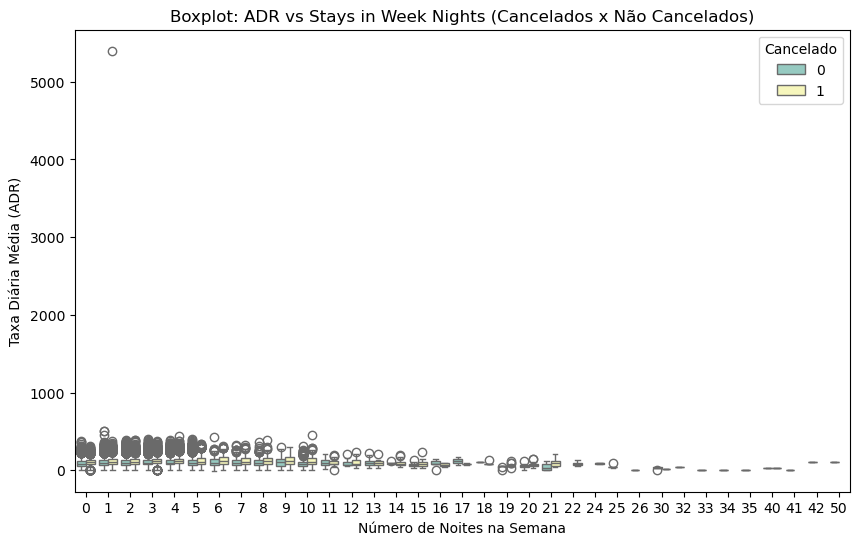

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


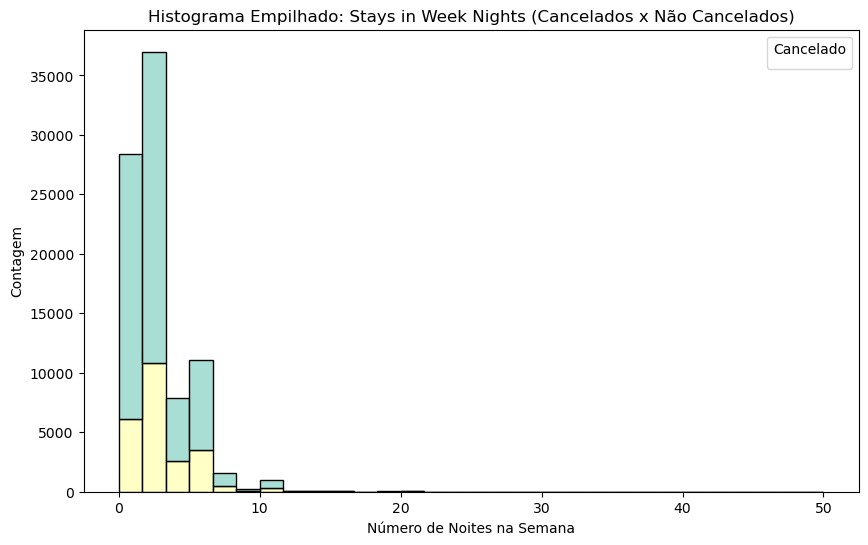

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compreender quantos colaboradores sa√≠ram (is_canceled) e que percentagem isso representa
total_reservas = hotel_data1.shape[0]
reservas_canceladas = hotel_data1['is_canceled'].sum()
percentagem_canceladas = (reservas_canceladas / total_reservas) * 100

# Exibir o n√∫mero e a percentagem de reservas canceladas
print(f"Total de reservas: {total_reservas}")
print(f"Reservas canceladas: {reservas_canceladas} ({percentagem_canceladas:.2f}%)")

# Criar um boxplot empilhado comparando 'adr' (taxa di√°ria) para 'stays_in_week_nights' 
# e comparar com aqueles que cancelaram e aqueles que n√£o cancelaram.
plt.figure(figsize=(10, 6))
sns.boxplot(x='stays_in_week_nights', y='adr', hue='is_canceled', data=hotel_data1, palette='Set3')
plt.title('Boxplot: ADR vs Stays in Week Nights (Cancelados x N√£o Cancelados)')
plt.xlabel('N√∫mero de Noites na Semana')
plt.ylabel('Taxa Di√°ria M√©dia (ADR)')
plt.legend(title='Cancelado', loc='upper right')
plt.show()

# Criar um histograma empilhado para visualizar a distribui√ß√£o de 'stays_in_week_nights' para aqueles que cancelaram e n√£o cancelaram.
plt.figure(figsize=(10, 6))
sns.histplot(data=hotel_data1, x='stays_in_week_nights', hue='is_canceled', multiple='stack', palette='Set3', bins=30)
plt.title('Histograma Empilhado: Stays in Week Nights (Cancelados x N√£o Cancelados)')
plt.xlabel('N√∫mero de Noites na Semana')
plt.ylabel('Contagem')
plt.legend(title='Cancelado')
plt.show()

**Visualiza√ß√µes Geradas**:

- **Boxplot**: Comparou a taxa di√°ria m√©dia (ADR) com o n√∫mero de noites passadas durante a semana, separando entre reservas canceladas e n√£o canceladas. O gr√°fico mostrou a distribui√ß√£o de pre√ßos e a varia√ß√£o nas reservas canceladas versus mantidas.

- **Histograma Empilhado**: Visualizou a distribui√ß√£o do n√∫mero de noites passadas na semana para h√≥spedes que cancelaram e n√£o cancelaram. Esse gr√°fico permitiu visualizar as diferentes concentra√ß√µes de reservas em diferentes categorias de estadias.

In [55]:
No boxplot, comparou-se a taxa di√°ria m√©dia (ADR) com o n√∫mero de noites durante a semana (stays_in_week_nights), separando as reservas canceladas das n√£o canceladas. Aqui est√£o as principais observa√ß√µes:

1. Distribui√ß√£o Geral:

	‚Ä¢	Para a maioria das categorias de ‚Äústays_in_week_nights‚Äù, as taxas di√°rias (ADR) variam significativamente tanto para reservas canceladas quanto para n√£o canceladas.
	‚Ä¢	Isso mostra que os valores de ADR t√™m um impacto nas decis√µes dos clientes, mas n√£o h√° um padr√£o claro entre cancelamentos e pre√ßos por n√∫mero de noites.

2. Sobreposi√ß√£o Significativa:

	‚Ä¢	Existe uma sobreposi√ß√£o entre as faixas de ADR das reservas canceladas e n√£o canceladas em diferentes n√∫meros de noites na semana.
	‚Ä¢	Isso sugere que a ADR n√£o √© suficiente como fator isolado para prever o cancelamento. Outros fatores, como a anteced√™ncia da reserva (lead_time), o tipo de cliente (customer_type) ou o n√∫mero de solicita√ß√µes especiais, podem ter um impacto mais significativo.

3. Outliers:

	‚Ä¢	Em algumas categorias, especialmente nas reservas n√£o canceladas, h√° a presen√ßa de outliers.
	‚Ä¢	Esses outliers indicam que algumas reservas s√£o feitas a pre√ßos muito mais altos ou baixos do que o padr√£o, o que pode exigir uma an√°lise mais profunda para entender se esses valores est√£o distorcendo as tend√™ncias.

Confus√£o Observada:

	‚Ä¢	A sobreposi√ß√£o dos valores de ADR entre reservas canceladas e n√£o canceladas dificulta a identifica√ß√£o de padr√µes claros.
	‚Ä¢	A distribui√ß√£o ampla em ambas as categorias sugere que o ADR por si s√≥ n√£o √© suficiente para prever com precis√£o quais reservas ser√£o canceladas. Portanto, uma abordagem multivariada ser√° necess√°ria para capturar as intera√ß√µes entre as vari√°veis.



SyntaxError: invalid character '‚Ä¢' (U+2022) (2895801112.py, line 5)

#### Pr√≥ximos Passos:

1. **An√°lise Multivariada**:

- J√° que o ADR sozinho n√£o explica bem o cancelamento, a pr√≥xima etapa ser√° analisar m√∫ltiplas vari√°veis simultaneamente.
- Vari√°veis como **lead_time, n√∫mero de solicita√ß√µes especiais, customer_type e stays_in_weekend_nights** devem ser combinadas para entender melhor os padr√µes de cancelamento.
- A correla√ß√£o entre essas vari√°veis pode revelar fatores combinados que influenciam as decis√µes de cancelamento de forma mais robusta.

2. **Cria√ß√£o de um Modelo Preditivo**:

- Podemos construir um modelo preditivo que considere v√°rias vari√°veis para prever a probabilidade de cancelamento.
- Modelos como regress√£o log√≠stica ou √°rvore de decis√£o s√£o bons candidatos, pois s√£o interpret√°veis e podem mostrar quais vari√°veis s√£o mais significativas para prever cancelamentos.
- O objetivo ser√° entender quais fatores combinados s√£o os mais relevantes e √∫teis para prever os cancelamentos.

3. **Avalia√ß√£o dos Outliers**:

- Uma an√°lise mais profunda dos outliers nos pre√ßos ser√° necess√°ria. Isso inclui verificar se esses valores est√£o distorcendo a an√°lise ou s√£o casos excepcionais que precisam de tratamento especial.
- Dependendo da origem dos outliers, podemos optar por remover ou ajustar esses valores antes de construir o modelo preditivo.

#### Pr√≥xima Etapa: Cria√ß√£o do Modelo Preditivo

Se voc√™ estiver pronto, podemos avan√ßar para a pr√≥xima etapa, que seria a constru√ß√£o do modelo preditivo para prever cancelamentos com base nos dados multivariados. Isso envolver√°:

- **Pr√©-processamento das vari√°veis relevantes**.
- **Escolha do modelo preditivo adequado**.
- **Avalia√ß√£o do desempenho do modelo para garantir a precis√£o das previs√µes**.


### An√°lise do Boxplot: Lead Time vs. Cancelamento

No boxplot, comparou-se o lead time (tempo de anteced√™ncia da reserva) com o status de cancelamento (is_canceled), separando as reservas canceladas das n√£o canceladas. Aqui est√£o as principais observa√ß√µes:

1. **Distribui√ß√£o Geral**:

- Para a maioria das categorias de reservas, o lead time tende a ser maior para reservas canceladas.
- Isso sugere que as reservas feitas com bastante anteced√™ncia t√™m maior probabilidade de serem canceladas, enquanto reservas feitas com pouco lead time tendem a ser mantidas.

2. **Sobreposi√ß√£o Significativa**:

- H√° uma sobreposi√ß√£o significativa nos valores de lead time entre reservas canceladas e n√£o canceladas.
- Isso sugere que, embora o lead time seja um fator relevante, ele n√£o √© suficiente para prever o cancelamento de forma isolada. Assim, outras vari√°veis (como o **tipo de cliente, n√∫mero de solicita√ß√µes especiais, etc**.) devem ser consideradas em conjunto.

3. **Outliers**:

- H√° outliers not√°veis, especialmente entre as reservas n√£o canceladas, indicando que algumas reservas feitas com muito pouca ou muita anteced√™ncia s√£o mantidas.
- Esses outliers podem distorcer a an√°lise, especialmente se n√£o forem tratados adequadamente.

### Confus√£o Observada:

- A sobreposi√ß√£o dos valores de **lead time** entre reservas canceladas e n√£o canceladas torna dif√≠cil identificar padr√µes claros baseados apenas nessa vari√°vel.
- A distribui√ß√£o ampla de valores em ambas as categorias mostra que o **lead time** por si s√≥ n√£o √© um fator isolado confi√°vel para prever o cancelamento.



### Pr√≥ximos Passos:

1. **An√°lise Multivariada**:

- Como o lead time sozinho n√£o explica completamente os cancelamentos, a pr√≥xima etapa ser√° analisar m√∫ltiplas vari√°veis simultaneamente, como:
    - **N√∫mero de solicita√ß√µes especiais**,
    - **Tipo de cliente (customer_type)**,
    - **N√∫mero de noites no fim de semana (stays_in_weekend_nights)**,
    - **Taxa di√°ria m√©dia (ADR)**.
    - **A intera√ß√£o dessas vari√°veis pode oferecer uma vis√£o mais completa dos padr√µes de cancelamento**.

2. **Cria√ß√£o de um Modelo Preditivo**:

- Podemos criar um modelo preditivo que considere v√°rias vari√°veis relevantes para prever a probabilidade de cancelamento.
- Modelos como regress√£o log√≠stica ou √°rvores de decis√£o s√£o bons candidatos, pois permitem interpretar as vari√°veis mais significativas.
- O objetivo √© entender quais fatores combinados influenciam mais os cancelamentos.

3. **Avalia√ß√£o dos Outliers**:

- Uma an√°lise mais aprofundada dos outliers no lead time ser√° necess√°ria. Pode ser interessante verificar se esses valores extremos afetam a an√°lise geral.
- Dependendo da natureza desses outliers, pode ser apropriado remov√™-los ou trat√°-los antes de construir o modelo preditivo.


### Pr√≥xima Etapa: Cria√ß√£o do Modelo Preditivo

Para seguir adiante com a cria√ß√£o do modelo preditivo para prever cancelamentos com base em vari√°veis multivariadas, podemos seguir os seguintes passos:

1. **Pr√©-processamento das vari√°veis, incluindo a normaliza√ß√£o e tratamento de outliers**.
2. **Escolha do modelo preditivo, como regress√£o log√≠stica ou √°rvore de decis√£o**.
3. **Avalia√ß√£o do desempenho do modelo, usando m√©tricas como precis√£o, recall e matriz de confus√£o.**


In [73]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Sele√ß√£o das vari√°veis relevantes
X = hotel_data1[['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights', 'deposit_type']]
y = hotel_data1['is_canceled']  # Vari√°vel alvo

# 2. Codifica√ß√£o das vari√°veis categ√≥ricas
categorical_features = ['hotel']
numerical_features = ['lead_time', 'adr', 'total_of_special_requests', 'stays_in_weekend_nights']

# 3. Pipeline de pr√©-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

# 4. Divis√£o dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Cria√ß√£o do pipeline do modelo
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', LogisticRegression(max_iter=1000))])

# 6. Treinamento do modelo
model.fit(X_train, y_train)

# 7. Previs√µes e avalia√ß√£o do modelo
y_pred = model.predict(X_test)
print("Acur√°cia:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

ValueError: A given column is not a column of the dataframe